#Importing Libraries

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing;

#Creating Dataset

In [53]:
genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)] #wild_type_sample
ko = ['ko' + str(i) for i in range(1,6)] #knock_out_sample
data = pd.DataFrame(columns=[*wt,*ko], index=genes)

for gene in data.index:
  data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
  data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  243  251  223  224  209  967  943  939  837  898
gene2  521  500  470  507  483  795  804  832  807  748
gene3  321  292  285  303  298  933  953  968  927  929
gene4  265  268  250  279  262  321  265  323  312  329
gene5  681  686  701  674  690  212  256  242  233  219
(100, 10)


#Data Preprocessing

In [54]:
scaled_data = preprocessing.scale(data.T)#StandardScaler().fit_transform(data.T)

#PCA

In [55]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

#Visualization

##Scree Plot

In [56]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)#percentage of variance
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

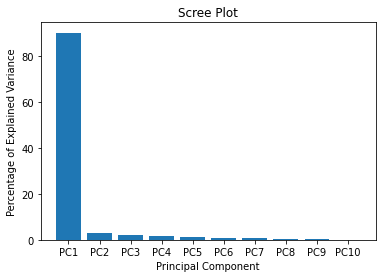

In [57]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

##PCA Plot

In [58]:
pca_df = pd.DataFrame(pca_data,columns=labels, index=[*wt,*ko])

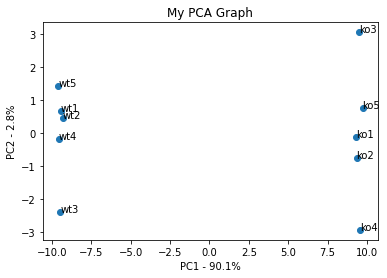

In [59]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.title('My PCA Graph')
for sample in pca_df.index:
  plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

#Loading Scores

In [66]:
loading_scores = pd.Series(pca.components_[0],index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene63   -0.105316
gene70    0.105285
gene91   -0.105281
gene96    0.105255
gene39   -0.105252
gene42    0.105246
gene28   -0.105237
gene48    0.105217
gene3     0.105213
gene43   -0.105191
dtype: float64
